# Exercises for Chapter 3

## 0.1 Import packages

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

## 0.2 A function for explicit numerical FT and iFT 

The cell below defines two functions to manually calculate a Fourier transform and an inverse Fourier transform. 

In [4]:
## fourrier transform of a box

def my_ft(time, func, freq):
  '''
  A function to calculate FT manually.
  time: the time array (needs to be regular)
  func: the function of time
  freq: the desired array of frequencies. 
  '''
  ft = np.empty(freq.shape, complex)
  dt = time[1]-time[0]
  for i in range(0,freq.size):
    ft[i] = dt * np.sum( func*np.exp(-1.j*2*np.pi*freq[i]*time) )

  return(ft)

def my_ift(freq, func, time):
  '''
  A function to calculate inverse FT manually.
  freq: the frequency array (needs to be regular)
  func: the function of frequency
  time: the desired array of times. 
  '''
  ift = np.empty(time.shape, complex)
  df = freq[1]-freq[0]
  for i in range(0,time.size):
    ift[i] = df * np.sum( func*np.exp(-1.j*2*np.pi*time[i]*freq) )

  return(ift)

## 1.1 Illustration of the Fourier transform of an electric field contant in time. 

In the code block below, I defined an array of time values `time` (from -2 time units to +2 time units). During that time, let's make the electric field be constant with an amplitude of 2 units. This is done in the `E` array. 

As you can see, I have already make a graph of $E(t)$ as a function of time. 

Now, let's check the $FT$. I have created a suitable array for the frequencies for which we will calculate the $FT$ called `freq`. 

1. From our lecture just before doing this exercise, what do you expect the FT to be for a (real) constant function of time? (Remember to talk about both the real and imaginary parts)

> Answer: I expect it do be a delta diract function at $\nu=0$ for the real component, and zero for the imaginary component

2. Use the FT function to calculate the $A(\nu)$ array. (Note that the `my_FT` accepts and returns arrays -- no need to do a loop for each frequency). Graph $A(\nu)$ in the right-hand graph (`ax[1.plot...`]). Does it match your expectation?

> Answer: No, the resulting function is a sinc for the real, but still zero for the imaginary

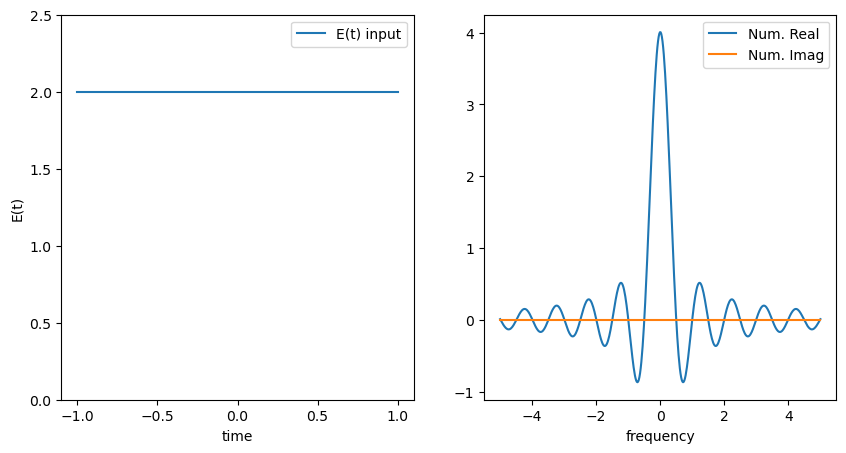

In [10]:
T = 2
time = np.linspace(-T/2,T/2, 500)

A = 2
E = A*np.ones(time.size)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(time, E, label='E(t) input')
ax[0].set_ylim(0,2.5)
ax[0].set_xlabel('time')
ax[0].set_ylabel('E(t)')
ax[1].set_xlabel('frequency')

freq = np.linspace(-10/T, 10/T, 500)

## Solution to #2 above:

ft = my_ft(time, E, freq)

ax[1].plot(freq, ft.real, label='Num. Real')
ax[1].plot(freq, ft.imag, label='Num. Imag')


###################
ax[0].legend(loc=0)
ax[1].legend(loc=0)

Now that we have explained the reason behind our results in the previous part, let's explore this a little more. 

3. First copy your solution from above in the code below, so that we can continue working on these some more

4. Now let's check our analytical solution we found in class for the $FT(\nu$) of a constant function that does not extend to infinity (a top hat function, centered at zero). Use the `freq` to calculate the analytical form and overplot in the right-hand panel. Does it match the numerical value?

> Answer: it works!

5. Use the analytial form to predict to location of the first zero of the function (or in other words, the width of the central peak). Draw two vertical lines to check that your calculation matches the numerical result. 

> Answer: If the width of the box in time is T, then locations of the first zeros of the FT will be at $\pm 1/T$. It matches. 

6. What happens if you make the box in time be assymetric around zero? (you can change a bound in time)

> Answer: there is now both a real and imaginary compoenents to the FT. This is because the $\sin$ term in the FT integral does not go to zero anymore. 

-> Now put back the time box the way it was originally. 

7. Let's see if we can recover the time box back by taking the iFT of our FT array. Overplot the result in the righ-hand graph. Does it match?

> Answer: No, it does not match. 

We'll talk about that last result in class. 


/Users/vpetit/opt/anaconda3/envs/py39/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


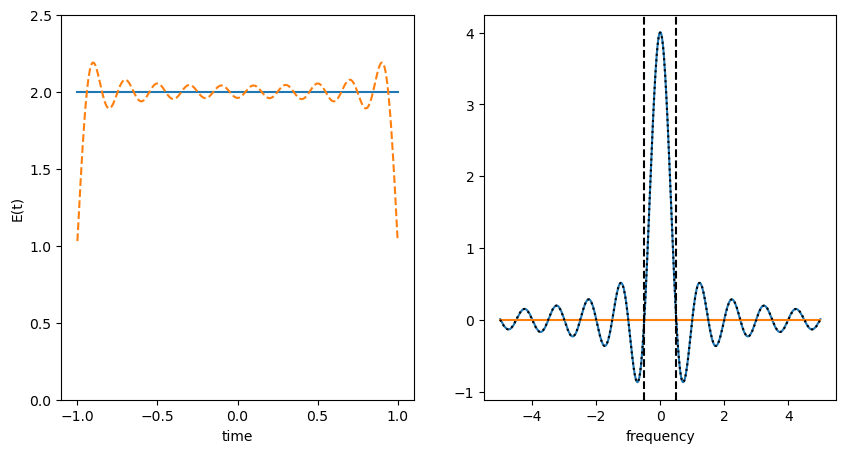

In [13]:
T = 2
time = np.linspace(-T/2,T/2, 500)
#time = np.linspace(0,T/2, 500) # for #6 above. 

A = 2
E = A*np.ones(time.size)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(time, E, label='E(t) input')
ax[0].set_ylim(0,2.5)
ax[0].set_xlabel('time')
ax[0].set_ylabel('E(t)')
ax[1].set_xlabel('frequency')

freq = np.linspace(-10/T, 10/T, 500)

## Copy paste your solution for #2 in the previous code cell here

ft = my_ft(time, E, freq)

ax[1].plot(freq, ft.real, label='Num. Real')
ax[1].plot(freq, ft.imag, label='Num. Imag')



## Solution to #4 and 5 above
bound = T/2
ft_analytic = A*2*np.sin(2*np.pi*freq*bound)/(2*np.pi*freq)
ax[1].plot(freq, ft_analytic, ls='dotted', c='k', label='analytic')
ax[1].axvline(x=1/T, c='k', ls='--')
ax[1].axvline(x=-1/T, c='k', ls='--')

## solution to #4 above

ift = my_ift(freq, ft, time)
ax[0].plot(time, ift, ls='--', label='iFT')

## solution to #5 above

#long_freq = np.linspace(-20/T, 20/T, 1000)
#long_ft = my_ft(time, E, long_freq)
#ax[1].plot(long_freq, long_ft, label='long')
#ax[0].plot(time, my_ift(long_freq, long_ft, time), ls='--', label='long iFT')

## 1.2 Mean period and coherence time calculation with astropy units and constant packages



We have seen in class that the mean period of the monochomatic wave will be $1/\nu_0$ and that the time of coherence (the first zero of the sinc component of $E(t)$) will be $1/\Delta\nu$). 

Let's practice using the astropy packages for units and constants to make these calculations for the example provided in the textbook in section 3.1: a 10 nm band centered on 500 nm. 

1. Print out your calculation in seconds
2. How does the mean period of the wave compares with the coherence time?
    >Answer: The coherence time is much larger than the mean period of the wave
3. How does the mean period and coherence time compare with a typical measurement cadence (usually optical electronic devices cannot make measurements faster than micro or nano seconds)
    >Answer: Both the mean period and the coherence time are much faster than the measurement time intervals. This means that we cannot follow the sin variation of the electric field, not its modulation by the overlaid sinc function. We are only measuring averages. 

In [4]:
dlambda = 10 * u.nanometer
lambda0 = 500 * u.nanometer


### Solution ###
nu0 = const.c/lambda0
dnu = const.c*dlambda / lambda0**2

print('Mean period is {}'.format((1/nu0).decompose()))
print('Coherence time is {}'.format((1/dnu).decompose()))

Mean period is 1.6678204759907603e-15 s
Coherence time is 8.339102379953802e-14 s
